In [1]:
import collections
import random

import pandas
import numpy

from curve_fits import Call, Spec

from curve_fits import curves
from curve_fits import frames

In [2]:
index = numpy.arange(0, 15, 0.2)
std = 40
frame = frames.FittingFrame({
    'second': [random.gauss(1 + x**2/2, std) for x in index],
    'third': [random.gauss(1 + x**2/2 - x**3/6, std) for x in index],
    'fourth': [random.gauss(1 + x**2/2 - x**3/6 + x**4/24, std) for x in index],
}, index=index)
frame.fit(second=[Call(Spec(curves.Polynomial, 3), Spec(curves.Xlog, 1, pole=-10))],
          third=[Call(Spec(curves.Polynomial, 4))],
          fourth=[Call(Spec(curves.Polynomial, 5))])

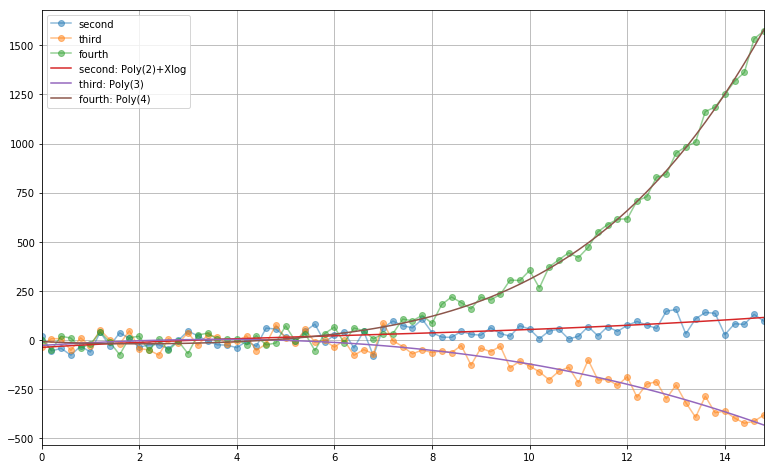

In [3]:
frame.plot(limit=None)

In [4]:
frame.best_fits(limit=1)

,,kind,fit,DOF
key,cost,,,
second,13.590650,Poly(2)+Xlog,(1936.7963074994436) + (298.8553894117838)s + ...,4
third,14.395448,Poly(3),(-27.946790677487808) + (15.67698051744604)s +...,4
fourth,12.079911,Poly(4),(-7.921383951176429) + (-12.90597683367838)s +...,5


In [5]:
fit = frame._fits['second'].pop()

In [6]:
poly, c = fit.curve.curves

In [7]:
poly

<Polynomial: (1936.7963074994436) + (298.8553894117838)s + (2.6662955513144224)s^2>

In [8]:
type(c)

curve_fits.curves.Xlog

In [9]:
c.parameters

array([-85.76505849])